In [1]:
import pydelaunay
import numpy as np

In [2]:
points = np.random.randint(low=0, high=1024, size=(512, 2))
points = np.unique(points, axis=0)
points.shape

(512, 2)

In [3]:
triangulation = pydelaunay.delaunay(points)

In [4]:
print(triangulation.vertices.shape, triangulation.triangles.shape)

(512, 2) (1005, 3)


### Find triangle, with a given point inside

In [5]:
p = [128, 128]
t_index: int = triangulation.find_triangle(*p)
print(f'triangle index = {t_index}\n triangles vertices are = {triangulation.vertices[triangulation.triangles[t_index]]}')


triangle index = 793
 triangles vertices are = [[176  90]
 [118 137]
 [136  61]]


### Plotting delaunay graph

In [6]:
import networkx as nx
from tqdm.notebook import tqdm
from itertools import combinations
from matplotlib import pyplot as plt

In [7]:
G = nx.Graph()
for t in tqdm(triangulation.triangles):
    vertices = list(map(tuple, triangulation.vertices[t]))
    for v in vertices:
        G.add_node(v)
    for u, v in combinations(vertices, 2):
        G.add_edge(u, v)

  0%|          | 0/1005 [00:00<?, ?it/s]

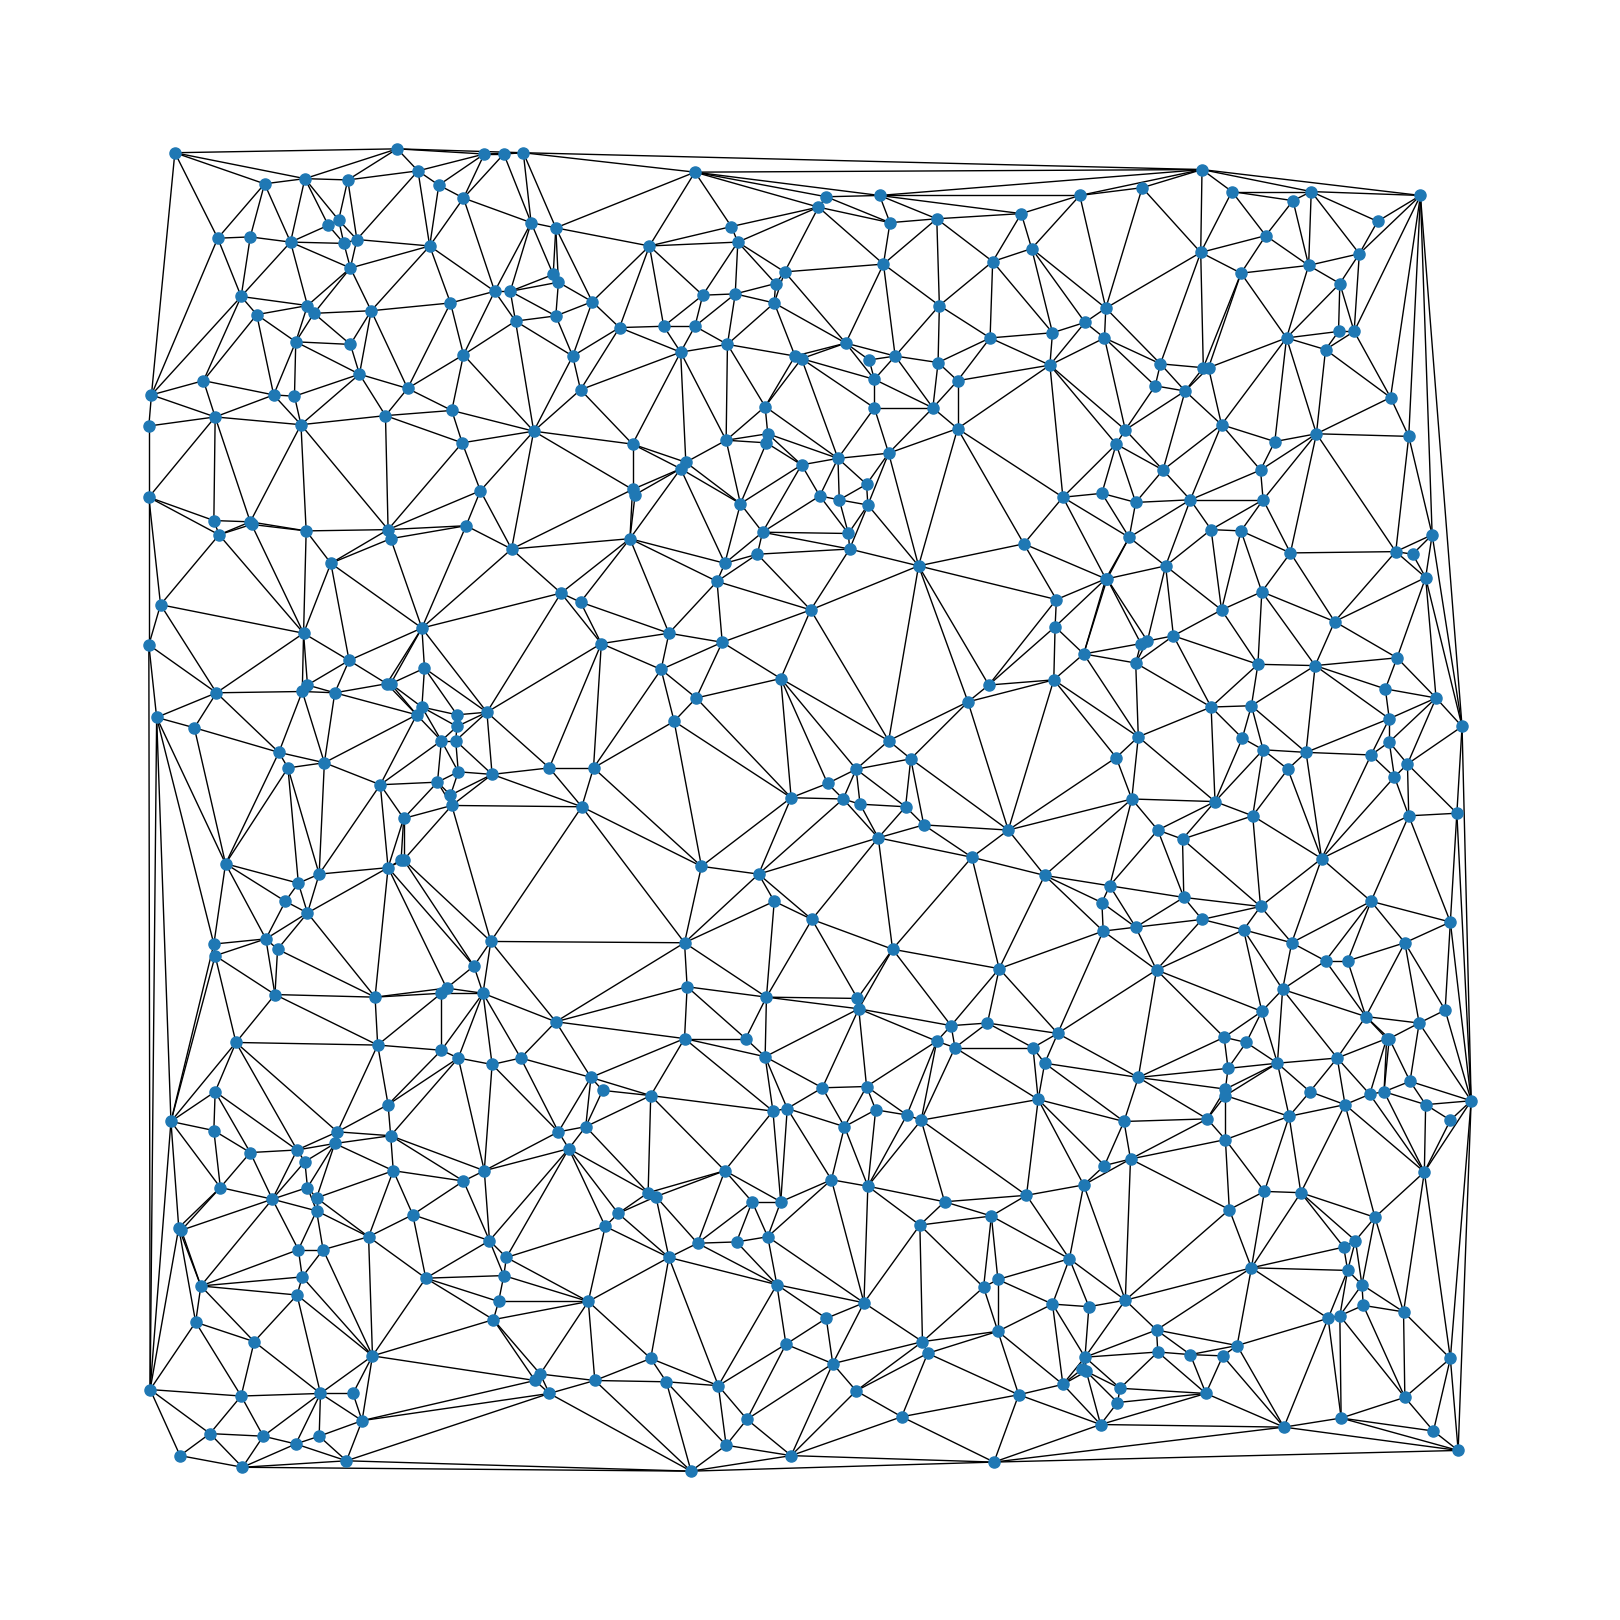

In [8]:
plt.figure(figsize=(16, 16))
nx.draw(G, pos={n: n for n in G.nodes}, node_size=64)

### Plotting SciPy Delaunay graph

In [9]:
from scipy.spatial import Delaunay

In [10]:
sptri = Delaunay(points)

In [11]:
S = nx.Graph()
for t in tqdm(sptri.simplices):
    vertices = list(map(tuple, sptri.points[t]))
    for v in vertices:
        S.add_node(v)
    for u, v in combinations(vertices, 2):
        S.add_edge(u, v)

  0%|          | 0/1007 [00:00<?, ?it/s]

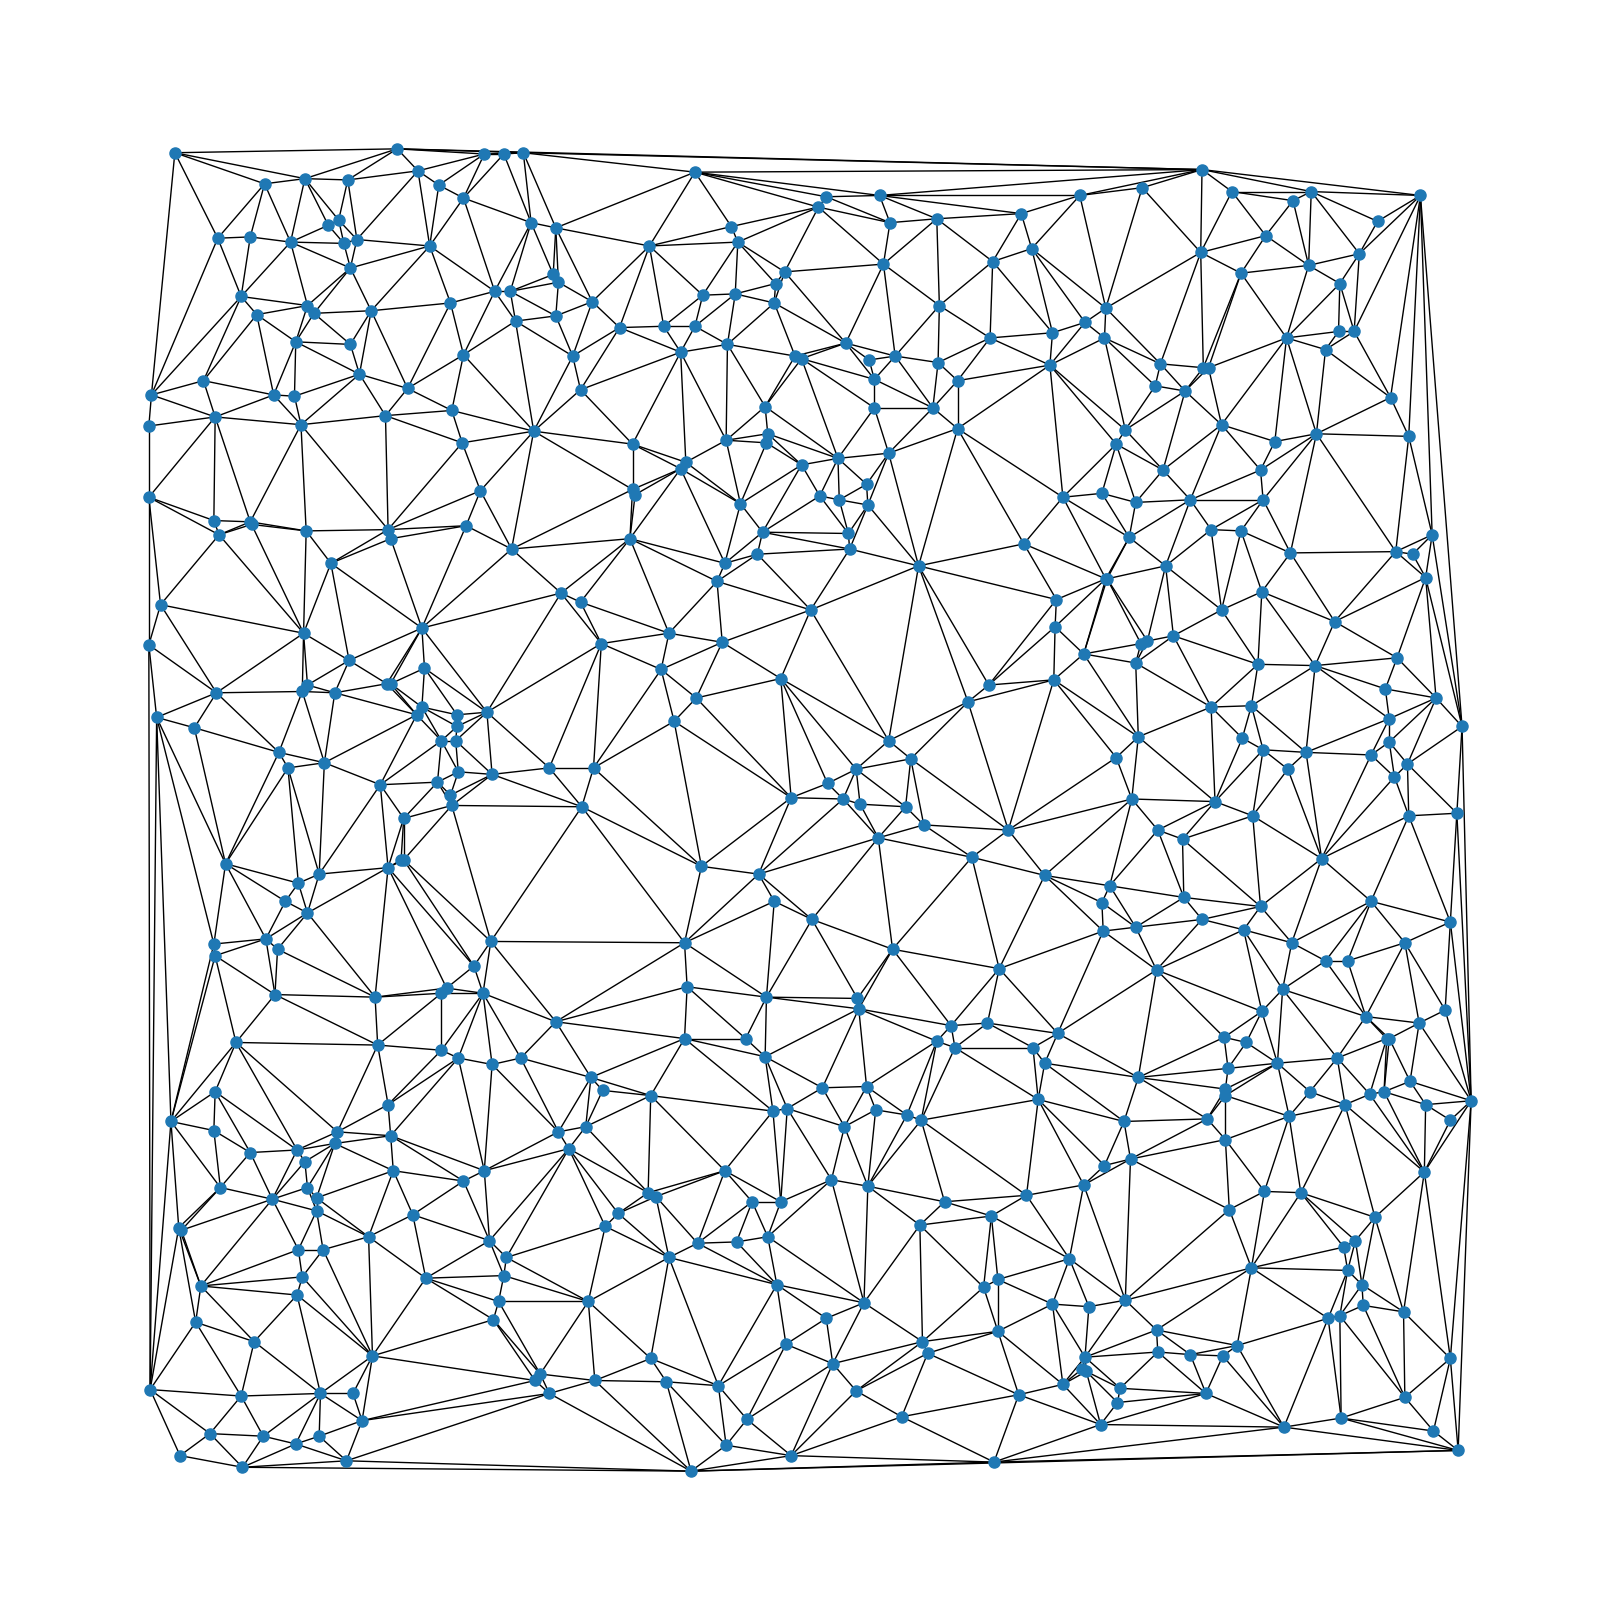

In [12]:
plt.figure(figsize=(16, 16))
nx.draw(S, pos={n: n for n in S.nodes}, node_size=64)

### Graphs equality

In [13]:
nx.utils.graphs_equal(G, S)

False